# Concrete Compressive Strength Prediction using DL Auto Keras(Auto ML)

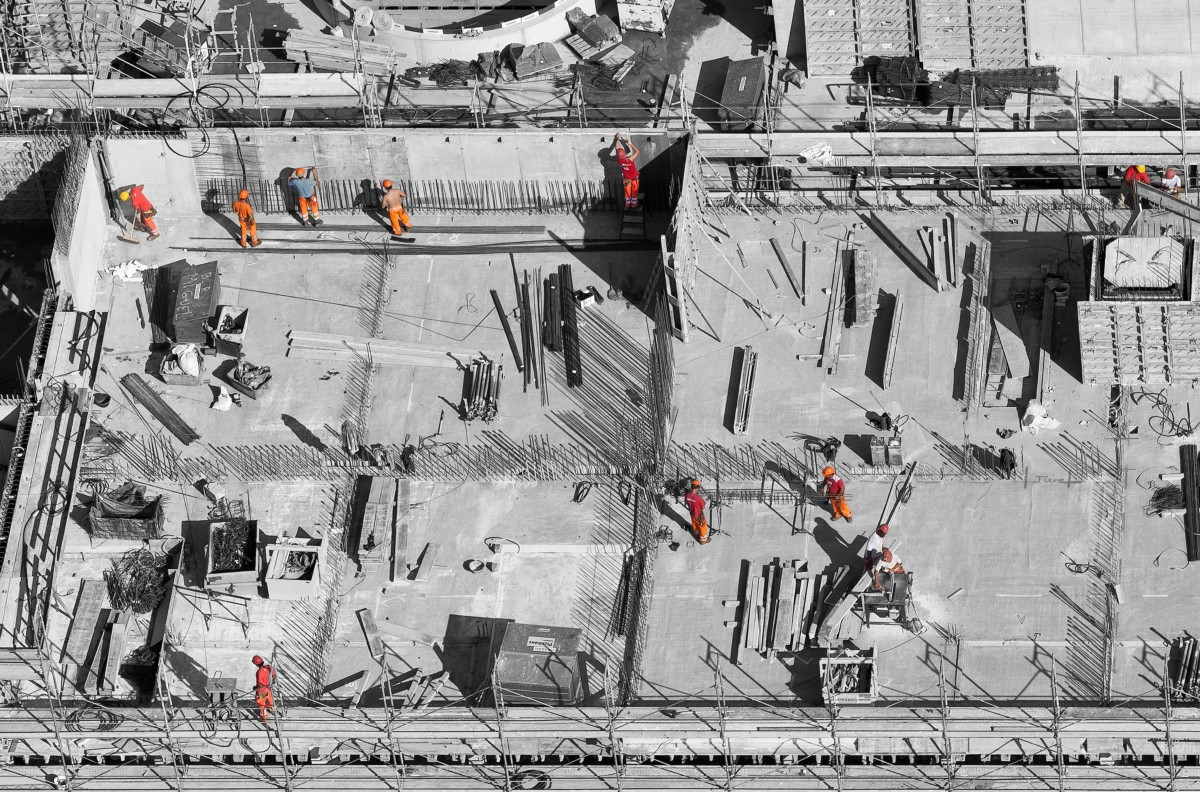

## Abstract

###  Concrete is the most important material in civil engineering. Theconcrete compressive strength is a highly nonlinear function of age andingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate

## Data Characteristics

### The actual concrete compressive strength (MPa) for a given mixture under a specific age (days) was determined from laboratory.

## Time Line o fthe Project:
- Data Analysis
- Data Preprocessing
- Feature Engineering
- Model Building using DL
- Model Building using Auto Keras

**Importing Libraries**

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 

In [2]:
!pip show autokeras
!pip install autokeras

     |████████████████████████████████| 166 kB 4.3 MB/s 
     |████████████████████████████████| 97 kB 6.2 MB/s 
     |████████████████████████████████| 454.4 MB 23 kB/s 
     |████████████████████████████████| 1.2 MB 27.3 MB/s 
     |████████████████████████████████| 462 kB 52.6 MB/s 
     |████████████████████████████████| 4.0 MB 38.3 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68713 sha256=701736fc18cf5b4b1b5f06df278b2ebb94e850ef00efae5e512b7665f6548baf
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.42.0
    Uninstalling grpcio-1.42.0:
      Successfully uninstalled grpcio-1.42.0
  A

In [3]:
df = pd.read_csv("/content/concrete_data.csv")
df.head()

cement  blast_furnace_slag  ...  age  concrete_compressive_strength
0   540.0                 0.0  ...   28                          79.99
1   540.0                 0.0  ...   28                          61.89
2   332.5               142.5  ...  270                          40.27
3   332.5               142.5  ...  365                          41.05
4   198.6               132.4  ...  360                          44.30

[5 rows x 9 columns]

In [4]:
df.shape

(1030, 9)

## Data Analysis

In [5]:
df.describe()

cement  ...  concrete_compressive_strength
count  1030.000000  ...                    1030.000000
mean    281.167864  ...                      35.817961
std     104.506364  ...                      16.705742
min     102.000000  ...                       2.330000
25%     192.375000  ...                      23.710000
50%     272.900000  ...                      34.445000
75%     350.000000  ...                      46.135000
max     540.000000  ...                      82.600000

[8 rows x 9 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
df.isna().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

### Heatmap

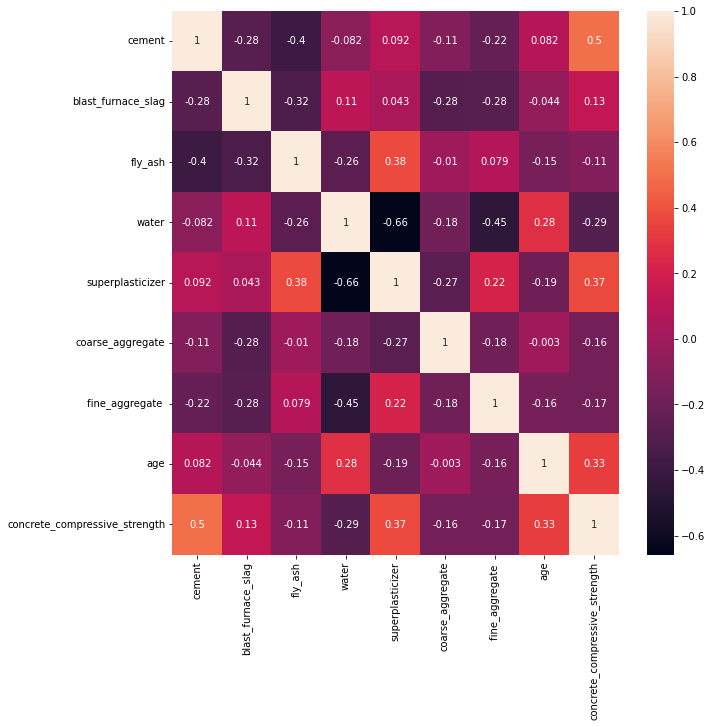

In [8]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

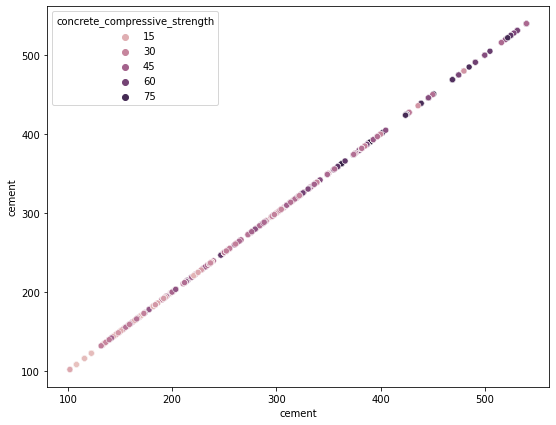

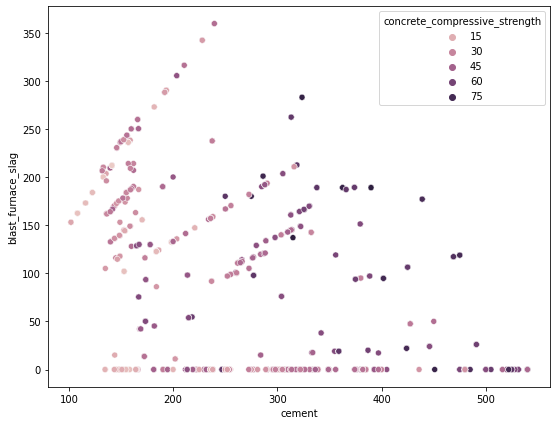

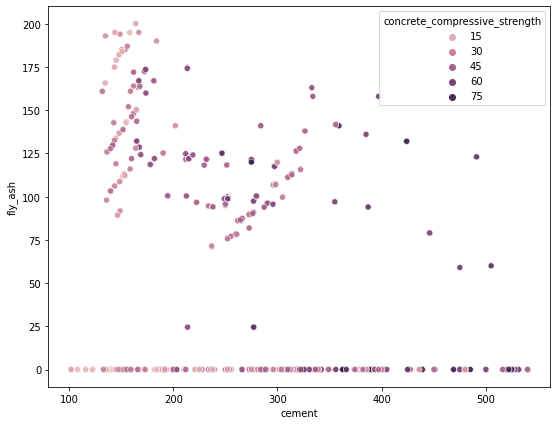

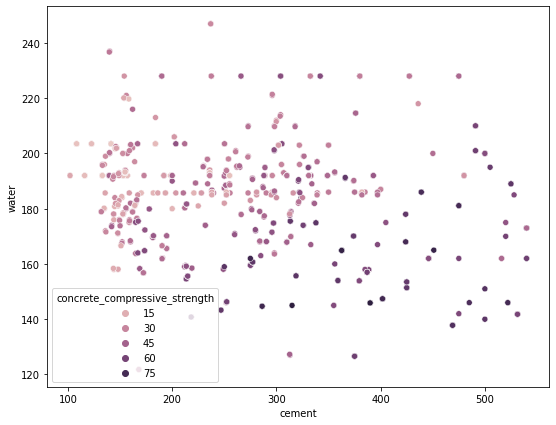

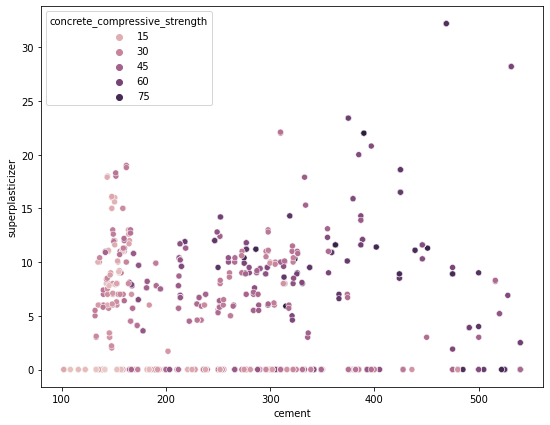

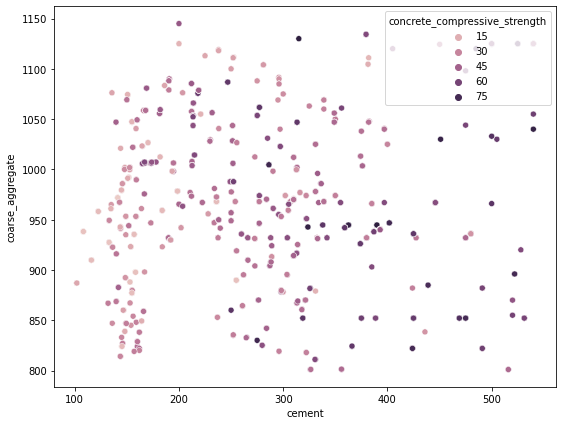

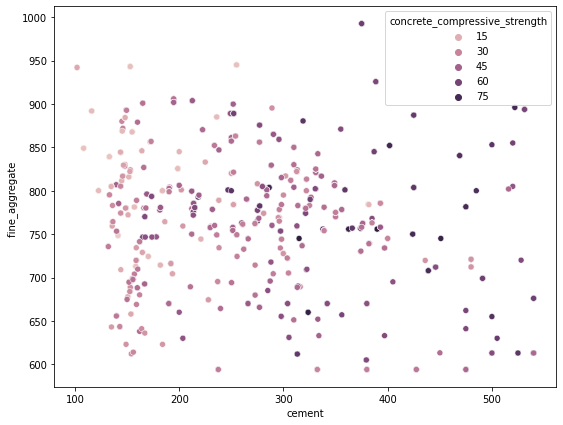

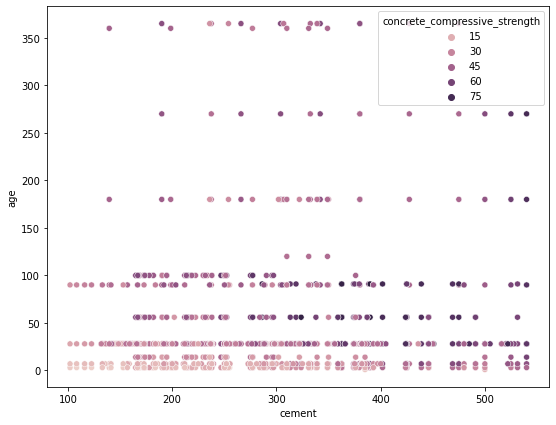

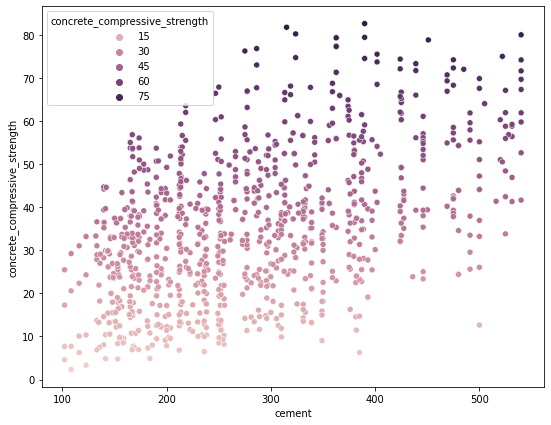

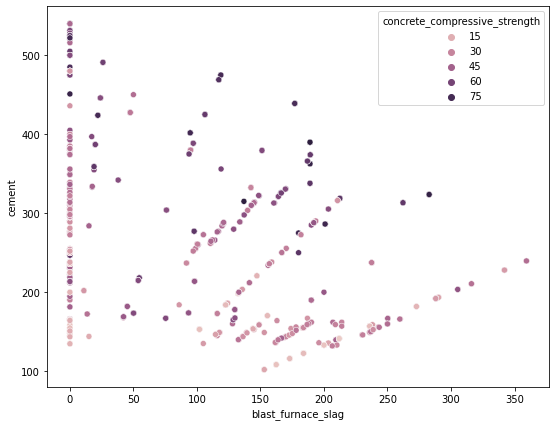

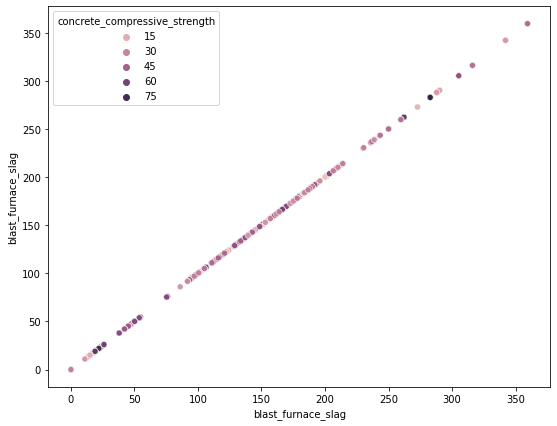

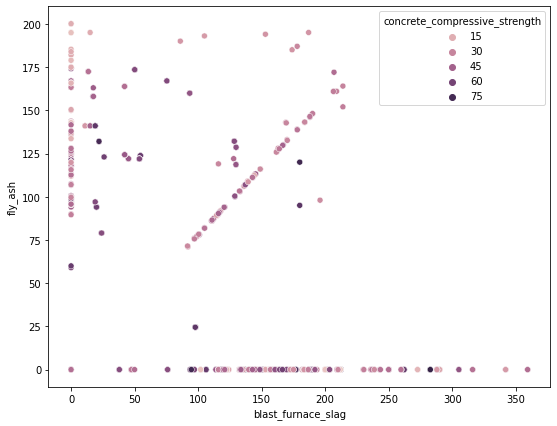

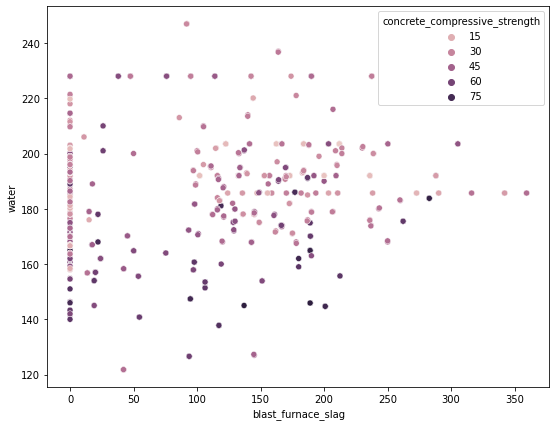

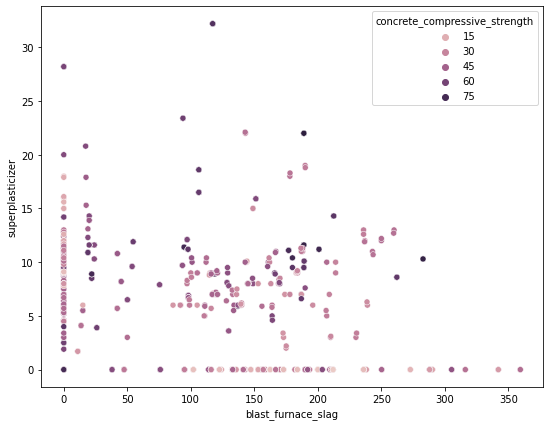

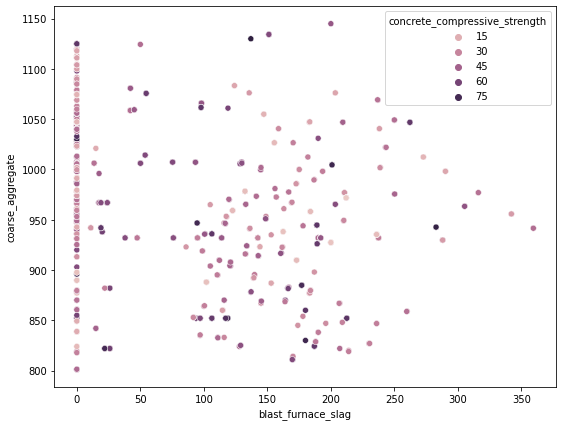

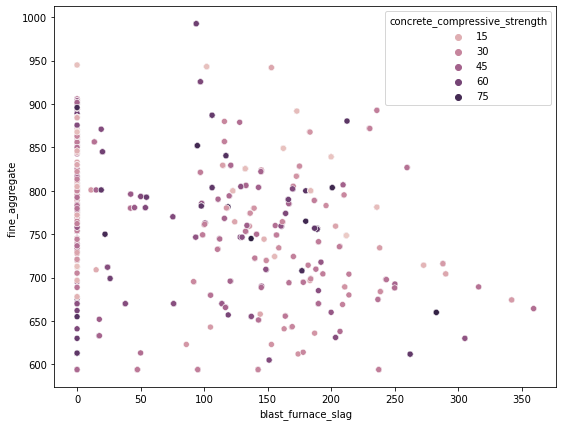

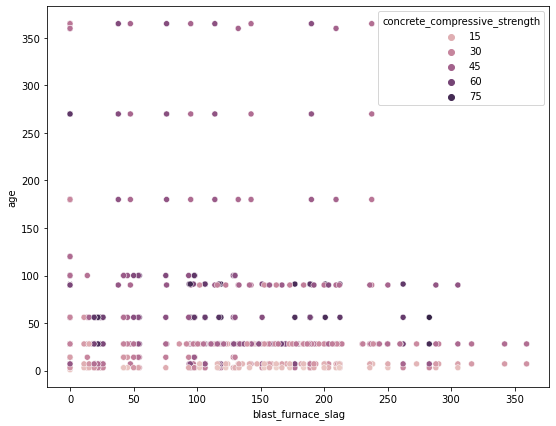

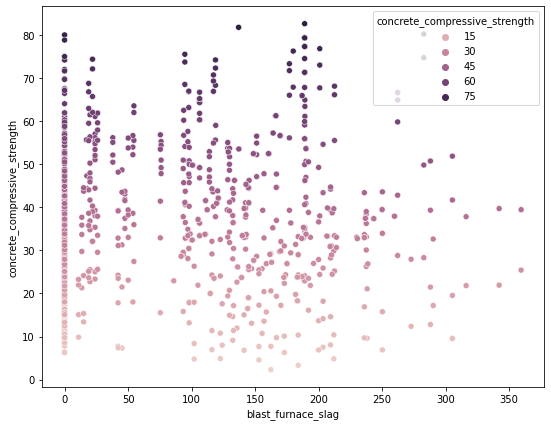

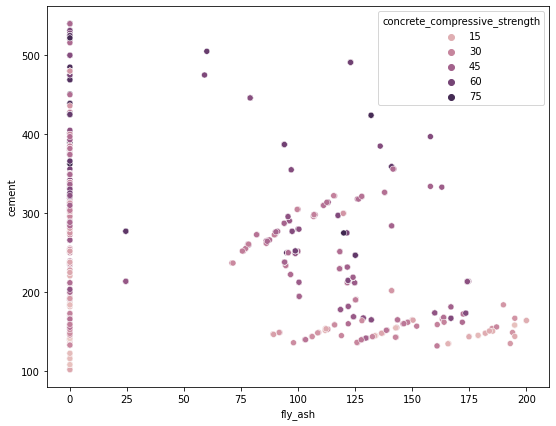

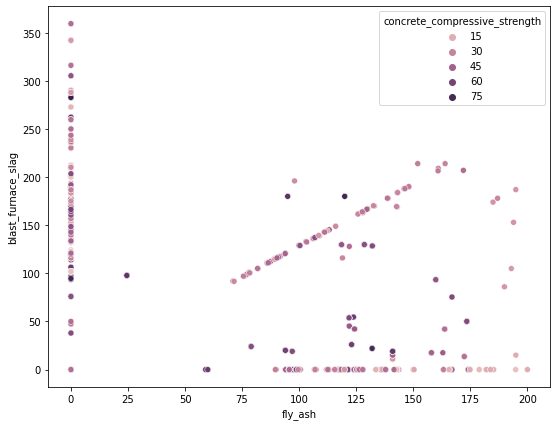

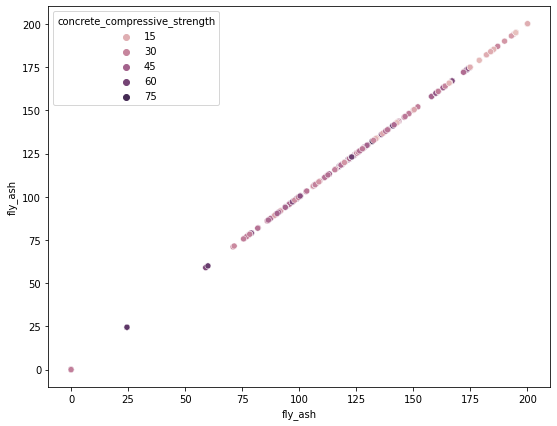

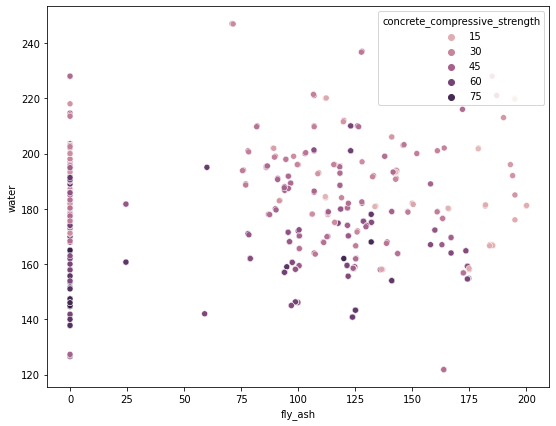

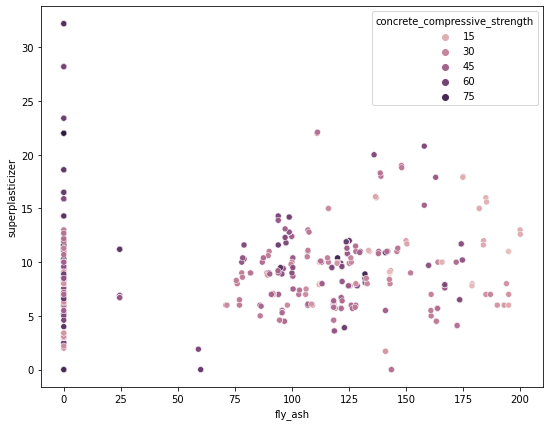

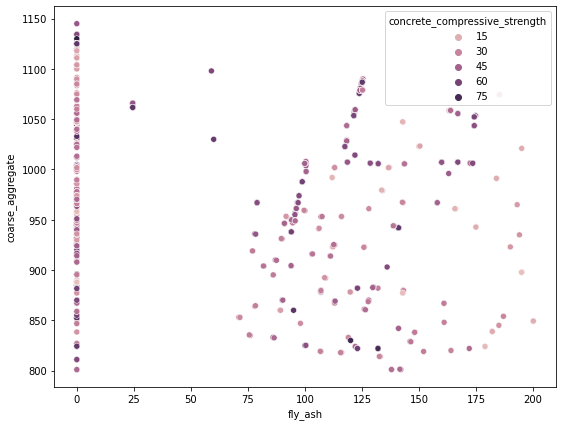

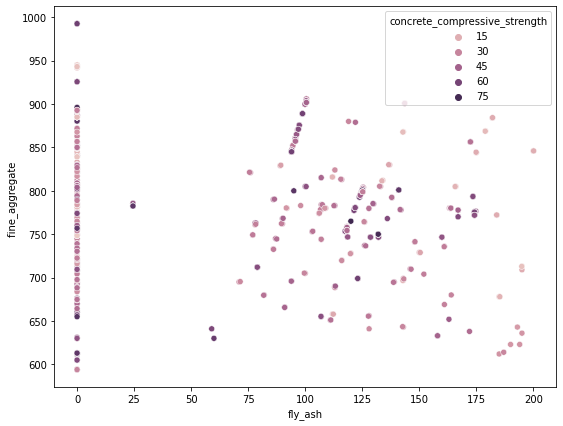

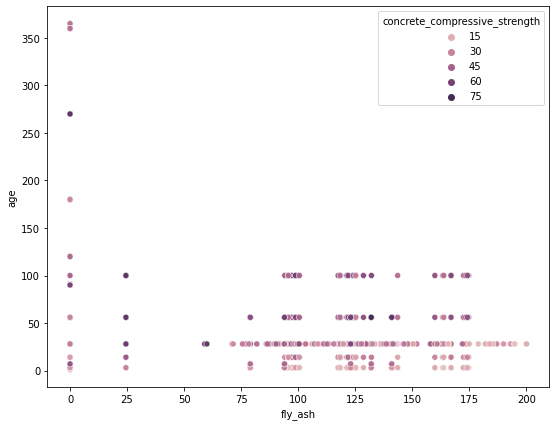

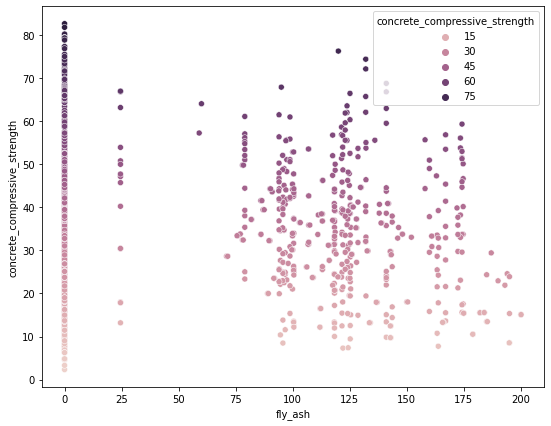

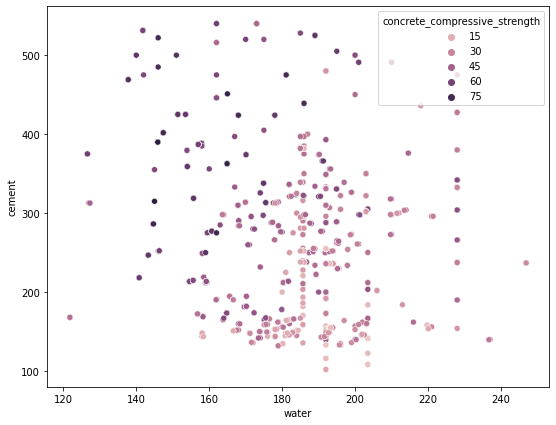

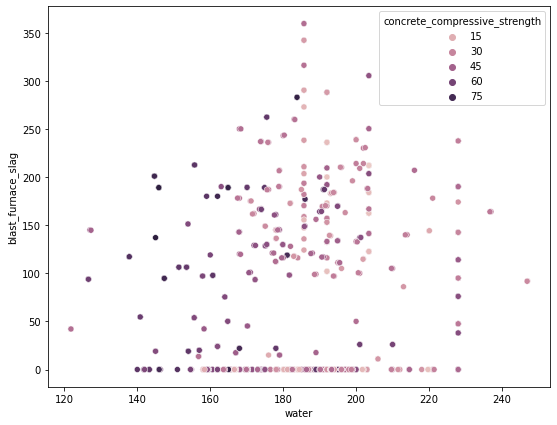

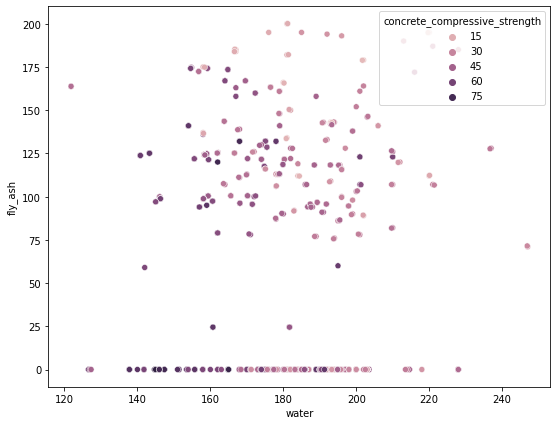

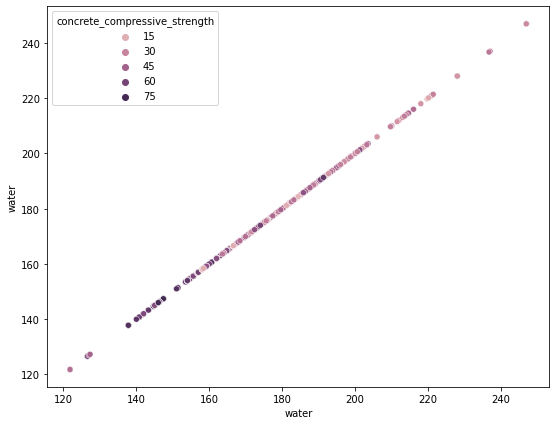

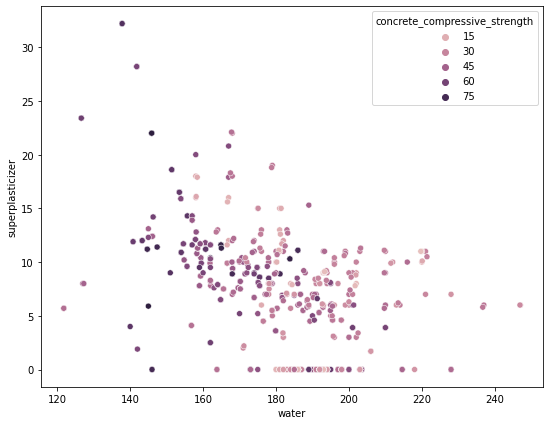

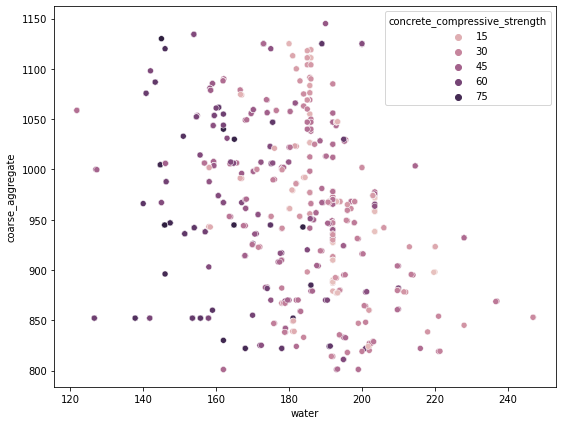

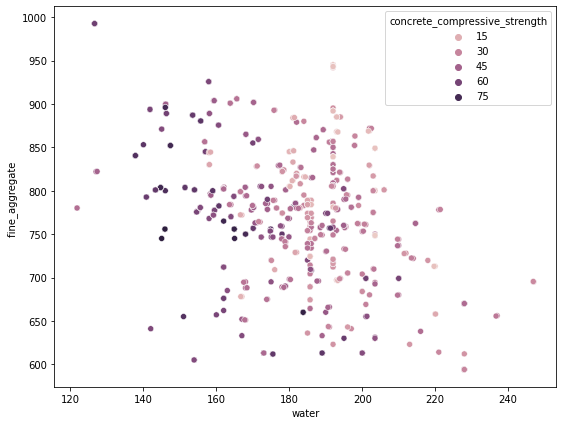

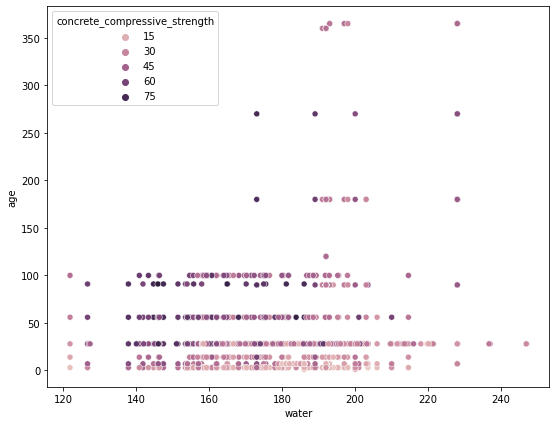

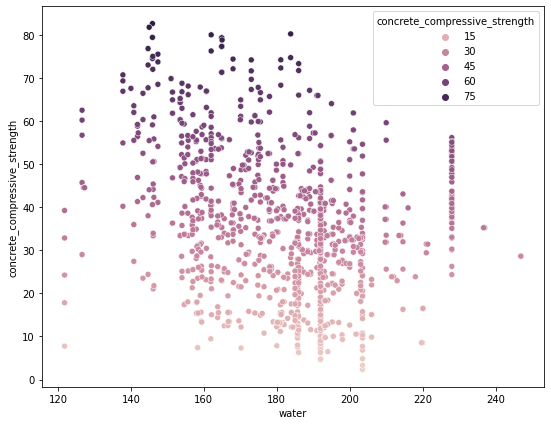

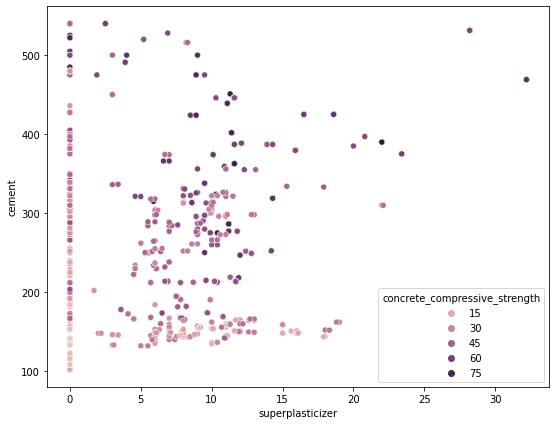

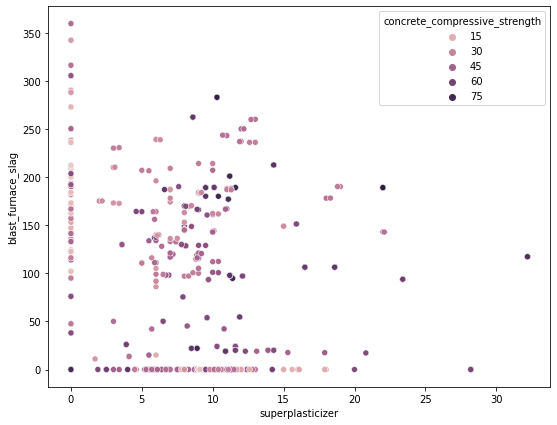

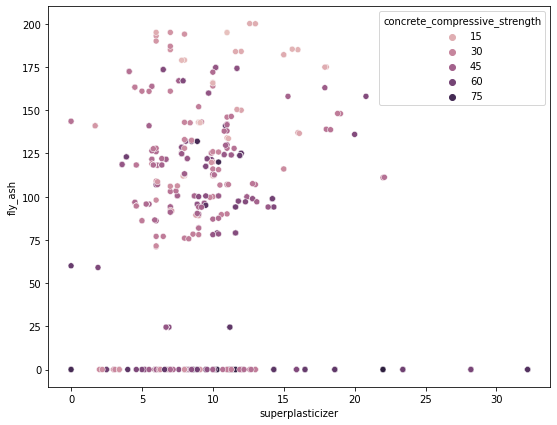

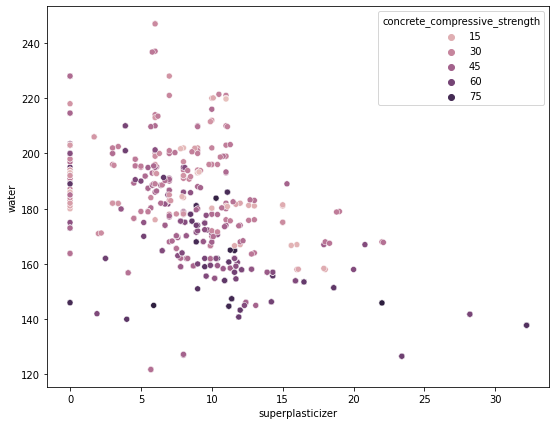

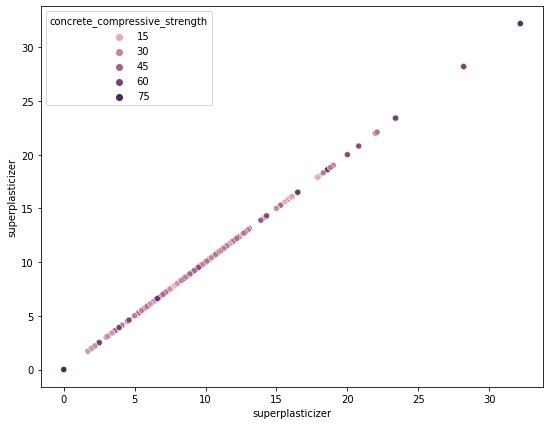

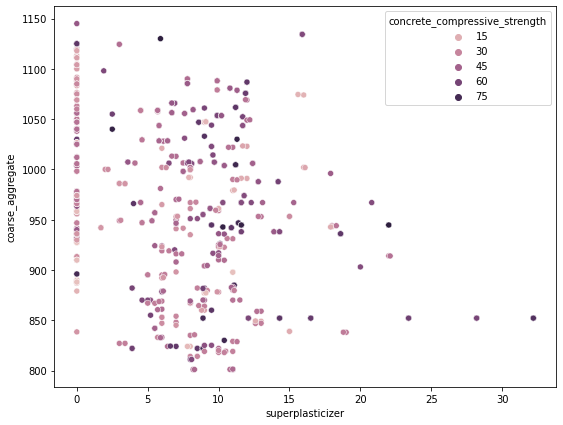

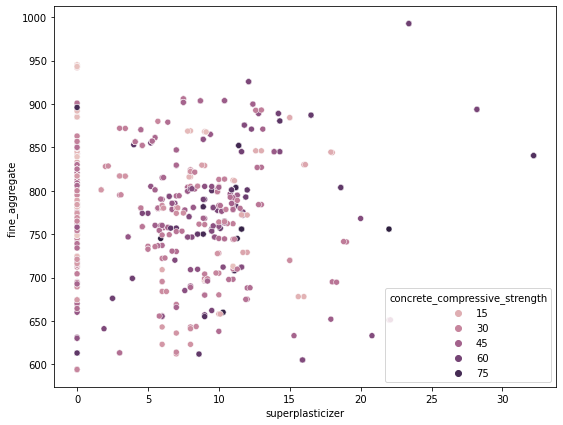

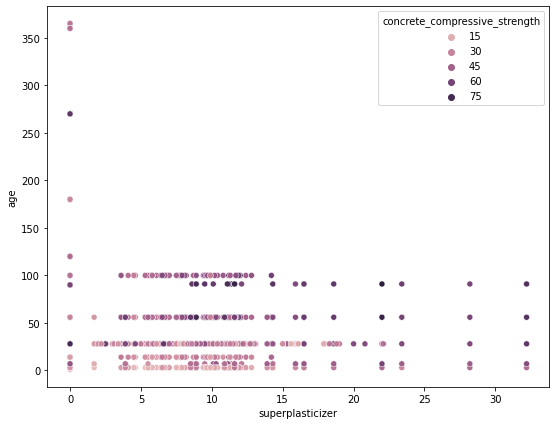

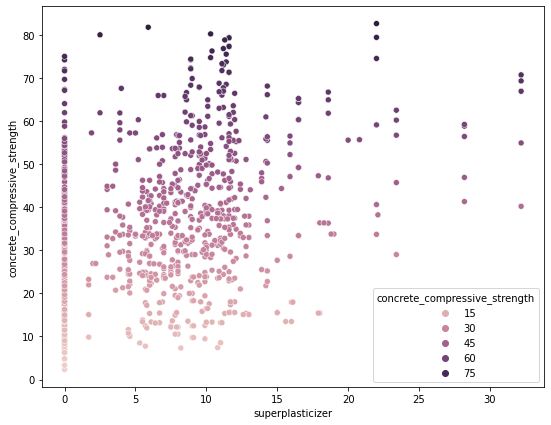

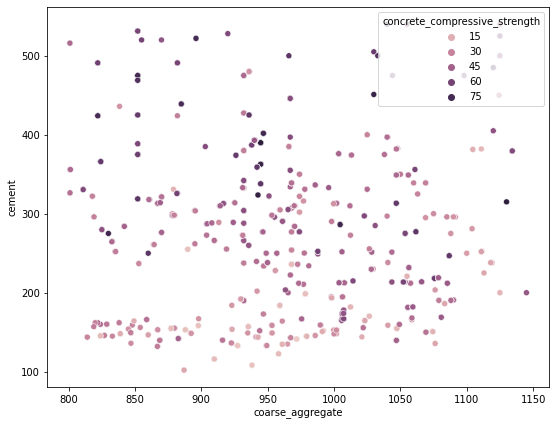

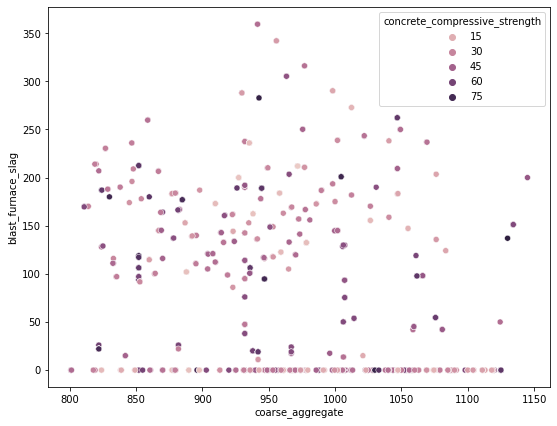

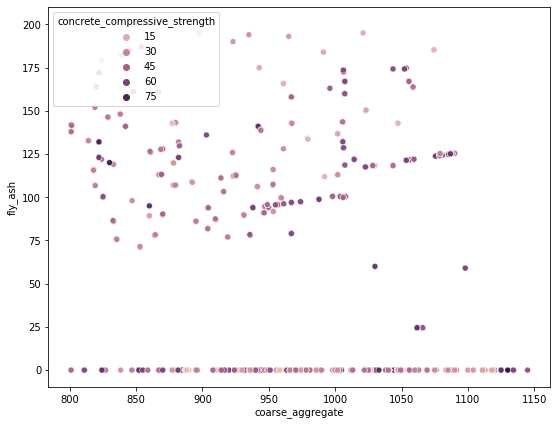

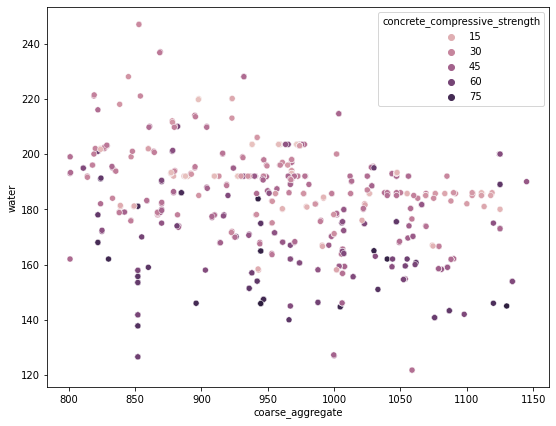

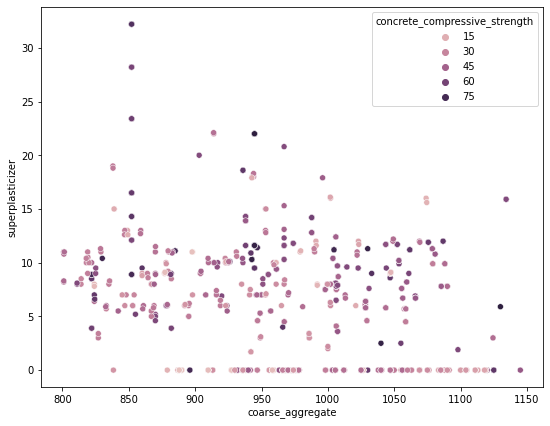

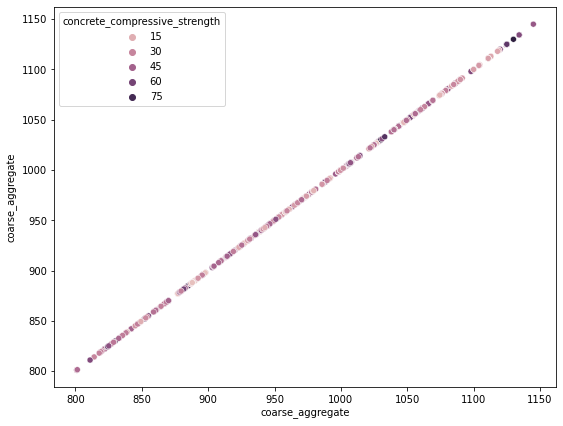

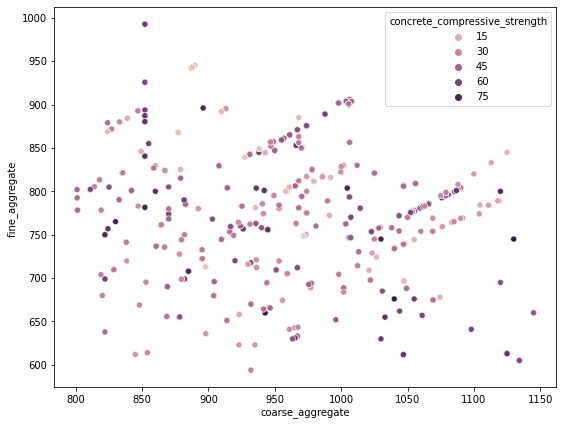

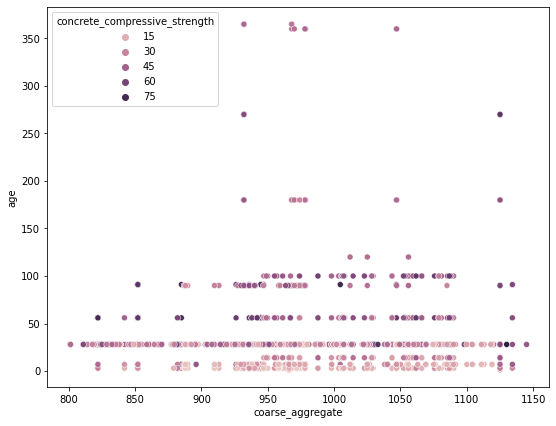

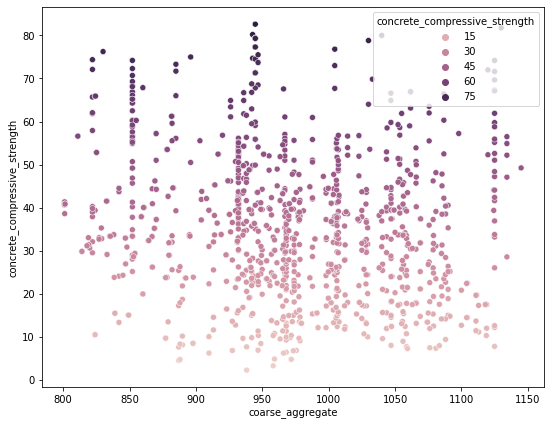

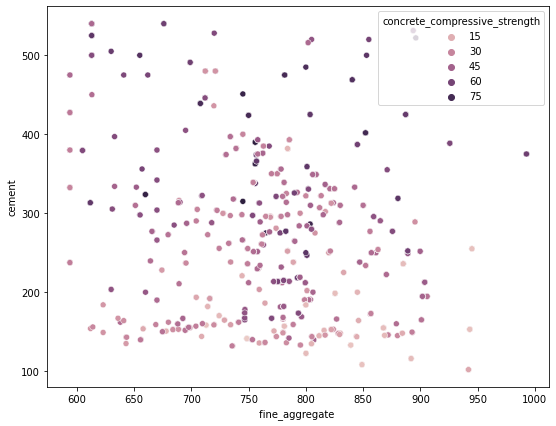

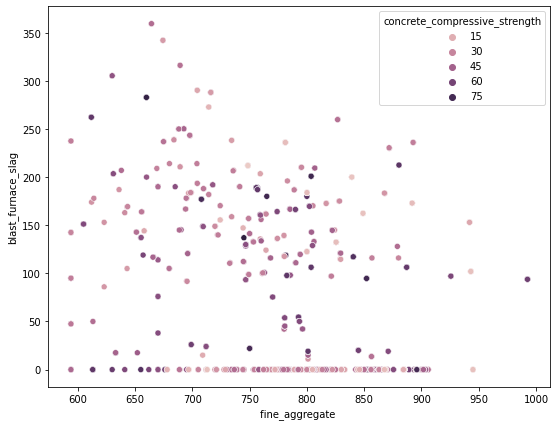

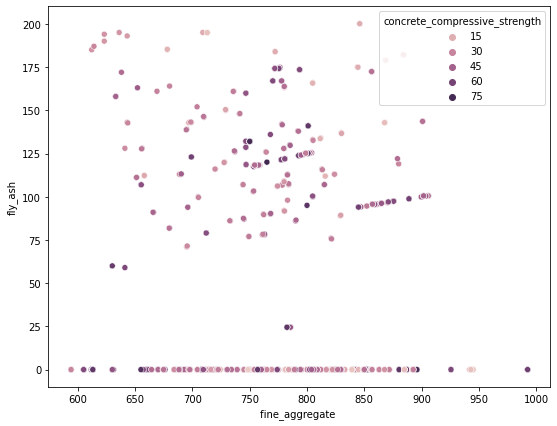

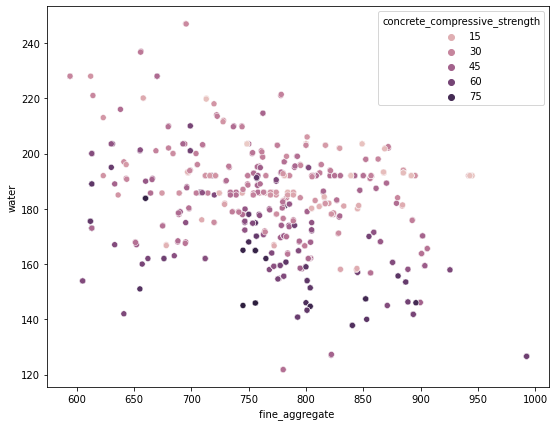

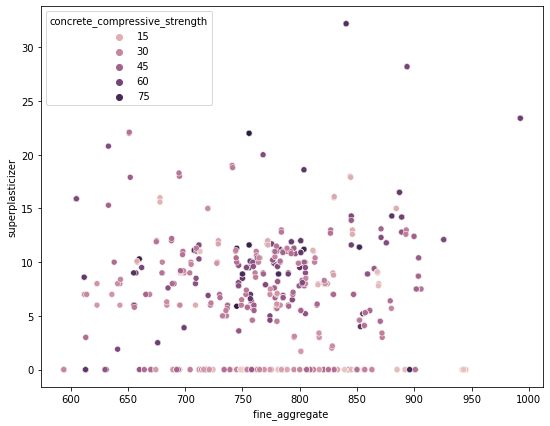

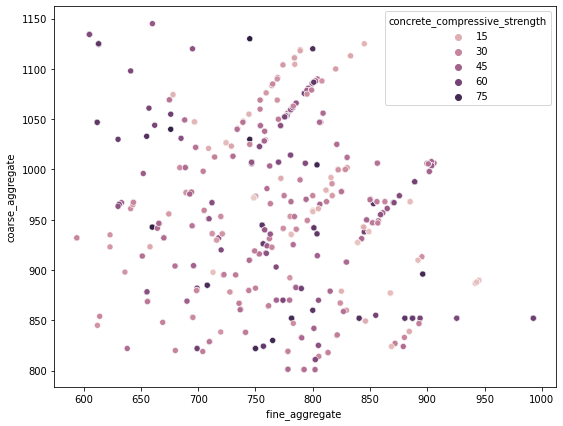

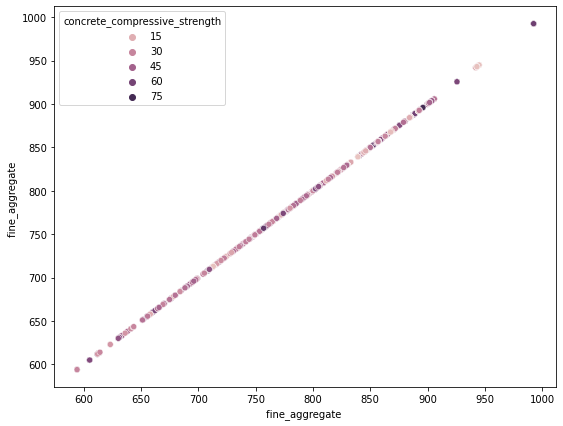

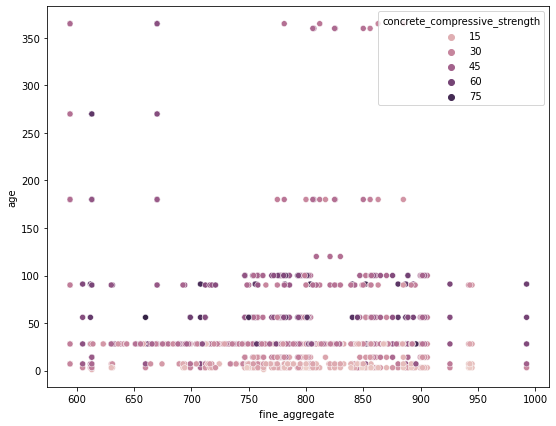

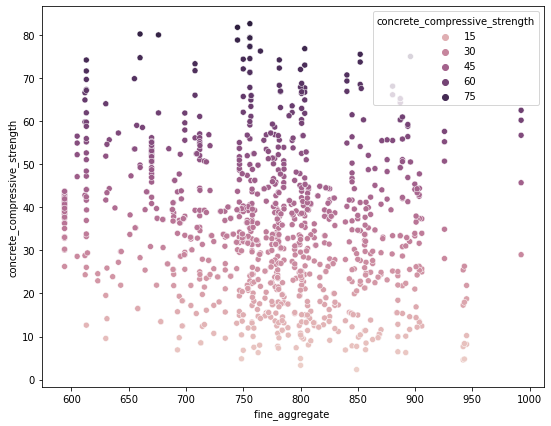

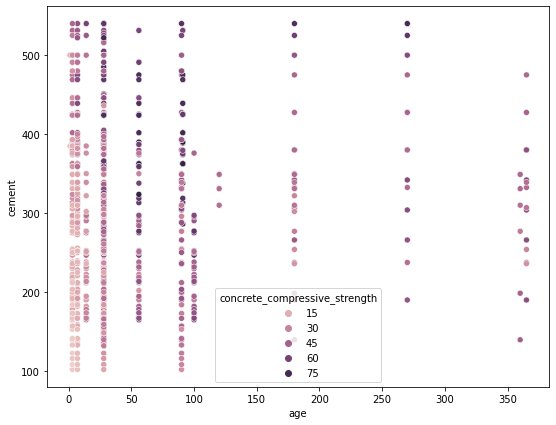

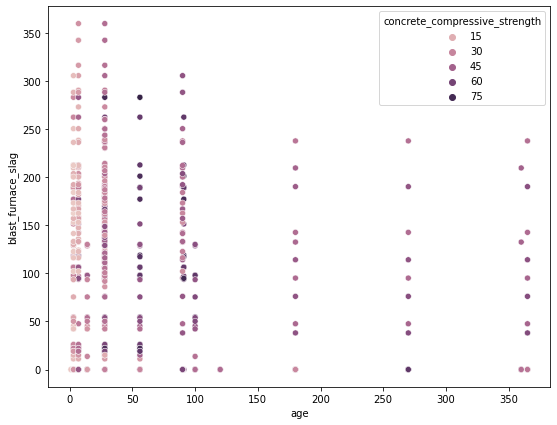

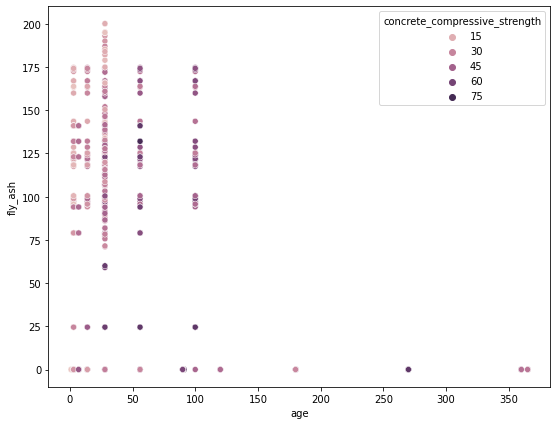

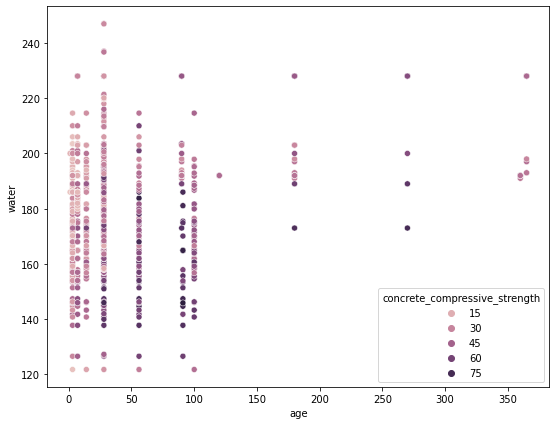

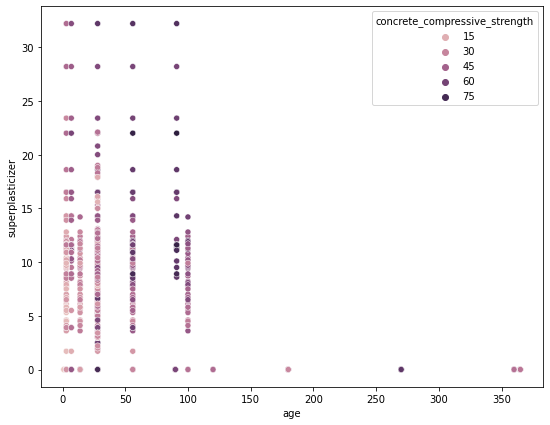

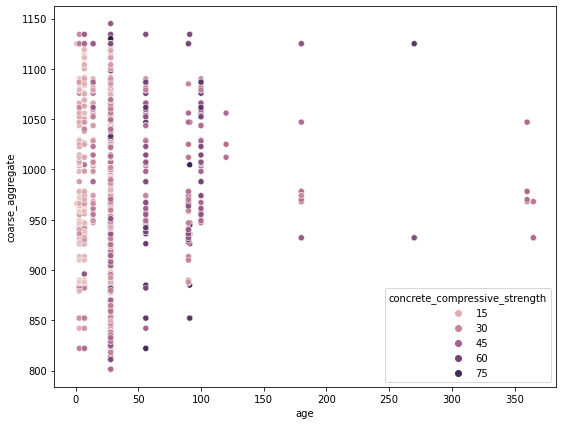

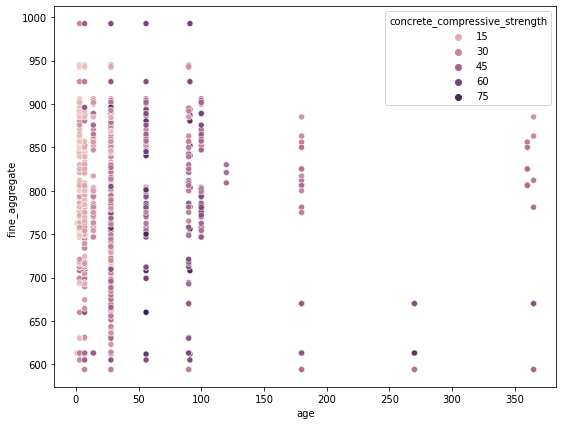

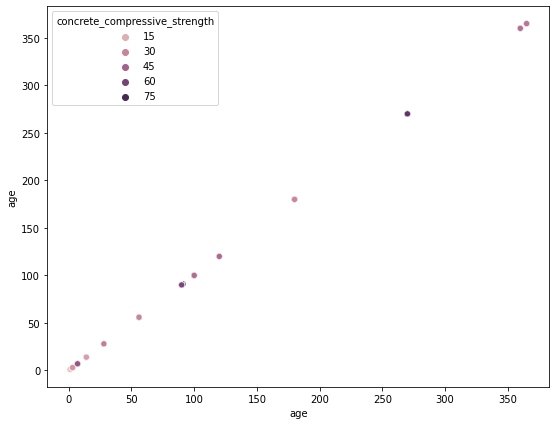

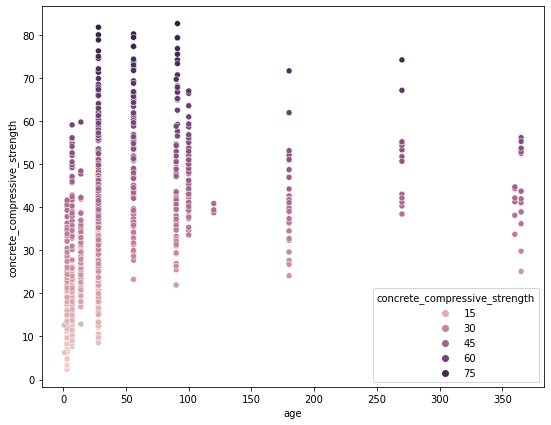

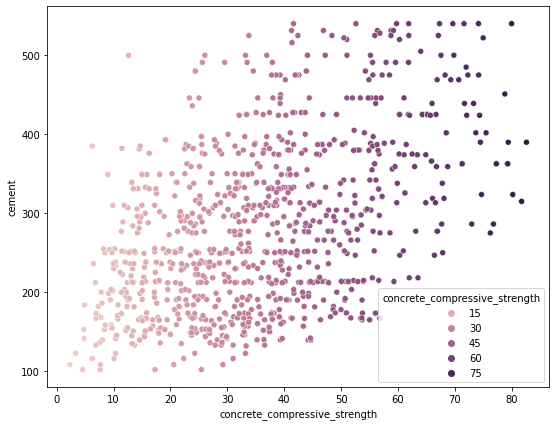

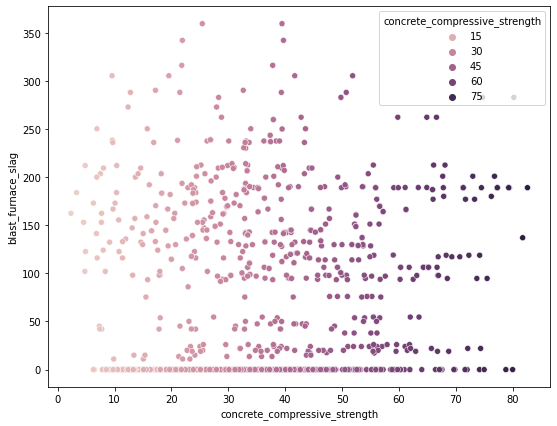

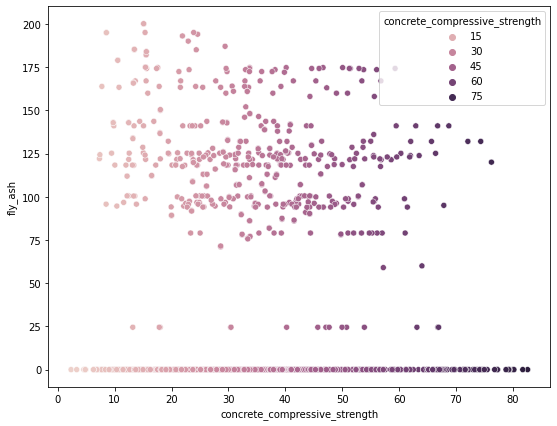

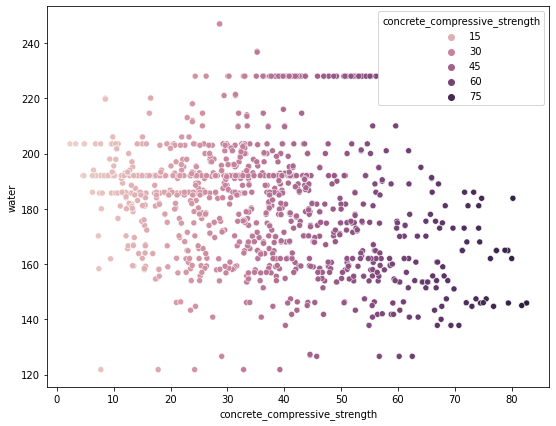

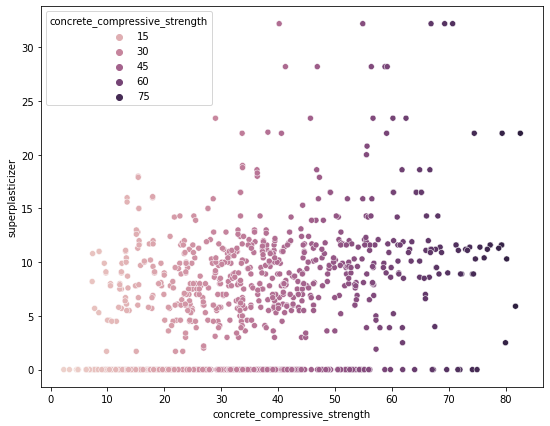

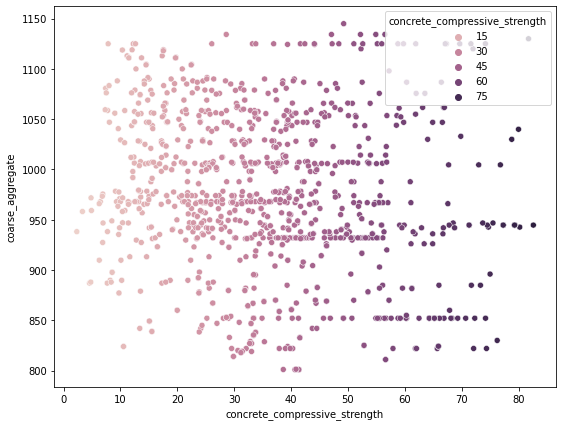

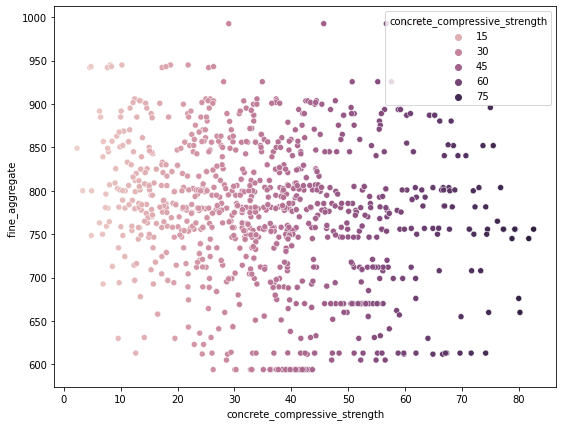

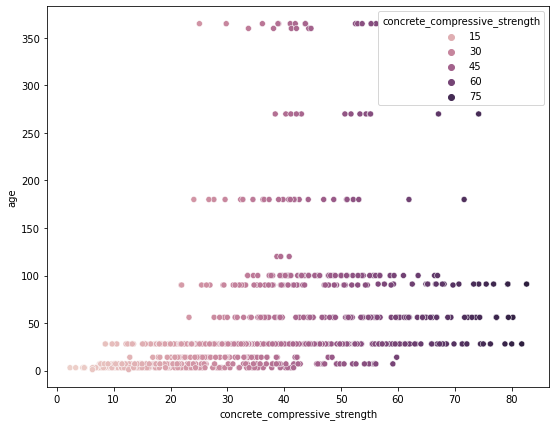

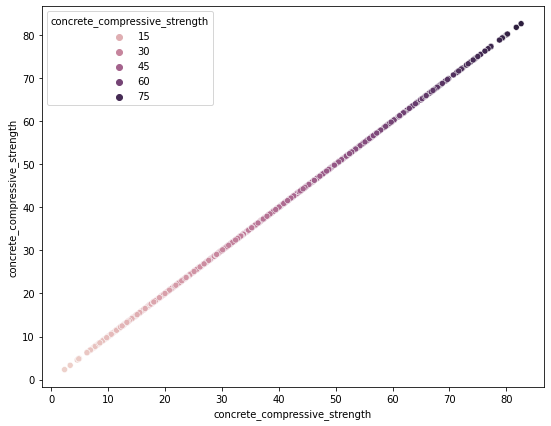

In [9]:
for i in df.columns:
    for j in df.columns:
        plt.figure(figsize=(9,7))
        sns.scatterplot(x=i,y=j,hue="concrete_compressive_strength",data=df)
        plt.show()

### Outlier Analysis

In [10]:
def outlier(data,column):
    plt.figure(figsize=(5,3))
    sns.boxplot(data[column])
    plt.title("{} distribution".format(column))

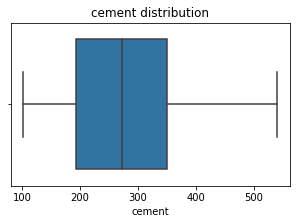

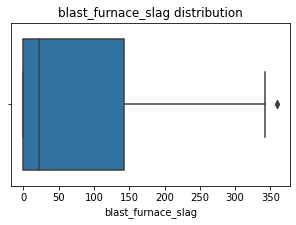

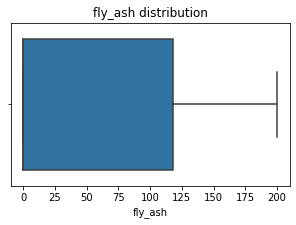

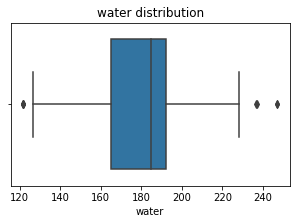

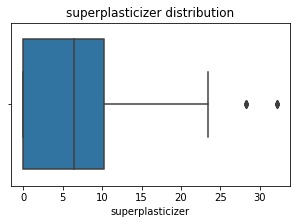

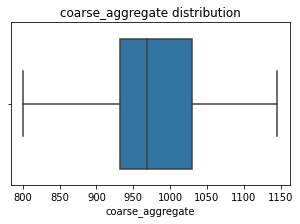

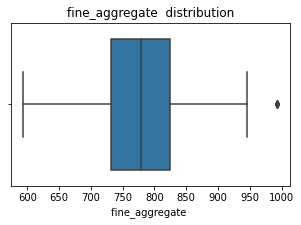

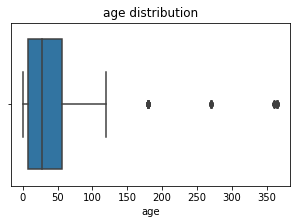

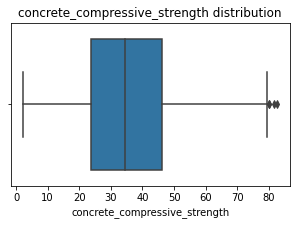

In [11]:
for i in df.columns:
    outlier(df,i)

#### Findind the min and max value for every feature

In [12]:
def end_value_show(data,column):
    print("min value of {} is {} \nmax value of {} is {}".format(column,data[column].min(),column,data[column].max()))

In [13]:
for i in df.columns:
    end_value_show(df,i)

min value of cement is 102.0 
max value of cement is 540.0
min value of blast_furnace_slag is 0.0 
max value of blast_furnace_slag is 359.4
min value of fly_ash is 0.0 
max value of fly_ash is 200.1
min value of water is 121.8 
max value of water is 247.0
min value of superplasticizer is 0.0 
max value of superplasticizer is 32.2
min value of coarse_aggregate is 801.0 
max value of coarse_aggregate is 1145.0
min value of fine_aggregate  is 594.0 
max value of fine_aggregate  is 992.6
min value of age is 1 
max value of age is 365
min value of concrete_compressive_strength is 2.33 
max value of concrete_compressive_strength is 82.6


#### Replacing the Outliers

In [14]:
df=df[df["blast_furnace_slag"]<350]
df=df[(df["water"]<246) & (df["water"]>122)]
df=df[df["superplasticizer"]<25]
df=df[df["age"]<150]

### Feature Engineering

In [15]:
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

In [16]:
df.drop(["blast_furnace_slag"],axis=1,inplace=True)
df.drop(["coarse_aggregate"],axis=1,inplace=True)
df.drop(["fine_aggregate "],axis=1,inplace=True)

In [17]:
df.columns

Index(['cement', 'fly_ash', 'water', 'superplasticizer', 'age',
       'concrete_compressive_strength'],
      dtype='object')

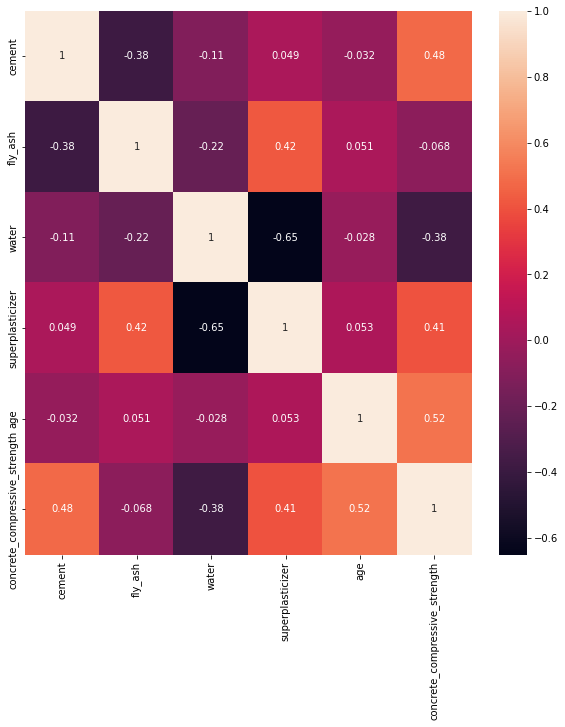

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

### Splitting the Data

In [19]:
x=df.drop(["concrete_compressive_strength"],axis=1)
y=df["concrete_compressive_strength"]

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [22]:
x_train.shape

(666, 5)

## Model Building using DL

### We will be using Keras Sequential Model for this project

In [23]:
from tensorflow.keras import models,layers

In [24]:
model=models.Sequential()
model.add(layers.Dropout(0.1))
model.add(layers.Dense(100,activation='relu',input_shape=(x_train.iloc[1].shape)))
model.add(layers.Dropout(0.7))
model.add(layers.Dense(5,activation='tanh'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(1))
model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])

In [26]:
model.fit(x_train,y_train,epochs=100,batch_size=1,verbose=2,validation_data=(x_test,y_test))

Epoch 1/100
666/666 - 3s - loss: 585.2192 - mae: 19.1644 - val_loss: 495.2131 - val_mae: 17.2525
Epoch 2/100
666/666 - 3s - loss: 516.4557 - mae: 17.8788 - val_loss: 438.2298 - val_mae: 16.0276
Epoch 3/100
666/666 - 3s - loss: 461.7930 - mae: 16.7679 - val_loss: 394.7271 - val_mae: 15.1094
Epoch 4/100
666/666 - 3s - loss: 437.8683 - mae: 16.4620 - val_loss: 362.1450 - val_mae: 14.4938
Epoch 5/100
666/666 - 3s - loss: 395.3796 - mae: 15.6293 - val_loss: 337.7295 - val_mae: 14.0688
Epoch 6/100
666/666 - 3s - loss: 390.8923 - mae: 15.4411 - val_loss: 320.6276 - val_mae: 13.7815
Epoch 7/100
666/666 - 3s - loss: 369.8728 - mae: 15.1644 - val_loss: 308.3024 - val_mae: 13.5702
Epoch 8/100
666/666 - 3s - loss: 356.4789 - mae: 15.0196 - val_loss: 298.8584 - val_mae: 13.4035
Epoch 9/100
666/666 - 3s - loss: 342.8848 - mae: 14.5394 - val_loss: 293.2219 - val_mae: 13.3063
Epoch 10/100
666/666 - 3s - loss: 342.7134 - mae: 14.7112 - val_loss: 288.9268 - val_mae: 13.2271
Epoch 11/100
666/666 - 3s - l

In [27]:
model.evaluate(x_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 276.6238 - mae: 13.1471


[276.62384033203125, 13.147052764892578]

In [28]:
pred=model.predict(x_test)
pred[4]

array([34.09178], dtype=float32)

## Using Auto Keras

 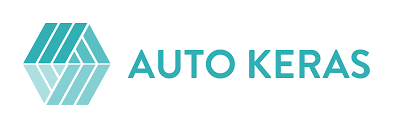

## AutoKeras: An AutoML system based on Keras. It is developed by DATA Lab at Texas A&M University

In [29]:
import autokeras as ak

In [30]:
reg = ak.StructuredDataRegressor(
    overwrite=True, max_trials=3
)

In [31]:
reg.fit(x=x_train, y=y_train, verbose=0)

INFO:tensorflow:Oracle triggered exit
Epoch 1/233
21/21 [==============================] - 1s 4ms/step - loss: 1490.4783 - mean_squared_error: 1490.4783
Epoch 2/233
21/21 [==============================] - 0s 4ms/step - loss: 1404.3813 - mean_squared_error: 1404.3813
Epoch 3/233
21/21 [==============================] - 0s 4ms/step - loss: 1281.1031 - mean_squared_error: 1281.1031
Epoch 4/233
21/21 [==============================] - 0s 4ms/step - loss: 1095.3259 - mean_squared_error: 1095.3259
Epoch 5/233
21/21 [==============================] - 0s 4ms/step - loss: 849.9225 - mean_squared_error: 849.9225
Epoch 6/233
21/21 [==============================] - 0s 4ms/step - loss: 584.5800 - mean_squared_error: 584.5800
Epoch 7/233
21/21 [==============================] - 0s 4ms/step - loss: 367.7201 - mean_squared_error: 367.7201
Epoch 8/233
21/21 [==============================] - 0s 4ms/step - loss: 250.9283 - mean_squared_error: 250.9283
Epoch 9/233
21/21 [==============================]

In [32]:
# evaluate the model
mae, _  = reg.evaluate(x_test, y_test, verbose=0)
#print('MAE: %.3f' % mae)
# use the model to make a prediction
yhat_test = reg.predict(x_test)

# get the best performing model
model = reg.export_model()


9/9 [==============================] - 0s 2ms/step


In [33]:
# summarize the loaded model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 5)]               0         
_________________________________________________________________
multi_category_encoding (Mul (None, 5)                 0         
_________________________________________________________________
normalization (Normalization (None, 5)                 11        
_________________________________________________________________
dense (Dense)                (None, 32)                192       
_________________________________________________________________
re_lu (ReLU)                 (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0     

In [34]:
yhat_test

array([[33.332005 ],
       [33.22386  ],
       [18.848387 ],
       [25.24563  ],
       [14.418933 ],
       [12.561683 ],
       [49.698322 ],
       [16.453594 ],
       [34.706665 ],
       [37.744102 ],
       [18.027746 ],
       [44.73256  ],
       [48.44744  ],
       [27.37969  ],
       [31.516787 ],
       [50.29557  ],
       [54.80799  ],
       [35.41714  ],
       [63.69093  ],
       [26.791998 ],
       [62.84249  ],
       [17.397953 ],
       [55.51368  ],
       [43.92066  ],
       [13.886348 ],
       [31.183508 ],
       [22.721693 ],
       [15.903148 ],
       [36.708347 ],
       [ 6.253641 ],
       [29.849873 ],
       [25.698694 ],
       [50.27117  ],
       [57.837944 ],
       [43.412315 ],
       [68.69864  ],
       [24.525143 ],
       [60.319103 ],
       [21.981459 ],
       [41.10196  ],
       [34.203953 ],
       [54.15553  ],
       [28.911234 ],
       [54.66216  ],
       [53.373135 ],
       [34.466743 ],
       [42.31164  ],
       [23.84

In [35]:
y_test

248    44.30
469    44.28
757    18.13
826    24.39
557    17.24
       ...  
862    35.23
513    40.29
939    32.72
454    39.64
277    36.97
Name: concrete_compressive_strength, Length: 286, dtype: float64